# Écoulements Élémentaires
Avec ce TP numérique, nous allons nous familiariser à plusieurs écoulements de bases qui nous serviront à construire la théorie des profils portants.

## Objectifs de la séance
Comprendre le lien entre les formules mathématiques et la structure des écoulements.


### Modules python et fonctions pour les graphiques
N'oubliez pas d'excuter les cellules de code suivantes sinon les modules, variables et fonctions ne seront pas connues.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['font.size'] = 12

Voici des petites fonctions pour vous aider dans les tracés.

In [3]:
def plot_contours_phi_psi(X,Y,PHI,PSI,titre=None,Ncontours=25):
    """
    X et Y sont des tableaux de coordonnées du plan
    PHI et PSI sont les fonctions potentiel et courant évaluées sur cette grille
    Vous pouvez ajouter un titre du graphique sous la forme d'une chaine de caractères.
    Vous pouvez changez le nombres de contours avec la variable Ncontours
    """
    plt.contour(X,Y,PHI,Ncontours,cmap=plt.cm.Blues)
    plt.contour(X,Y,PSI,Ncontours,linestyles='dashed',cmap=plt.cm.Reds)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('image')
    if not titre is None:
        plt.title(titre)
    plt.show()

In [4]:
def plot_lignes_courant(X,Y,U,V,titre=None):
    """
    X et Y sont des tableaux de coordonnées du plan
    U et V sont les composantes cartésiennes de vitesse évaluées sur cette grille
    Vous pouvez ajouter un titre du graphique sous la forme d'une chaine de caractères.
    """
    plt.streamplot(X,Y,U,V)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('image')
    if not titre is None:
        plt.title(titre)
    plt.show()

### Exercice 1 - Rappels théoriques
(avec la prof au tableau)
1. Listez les hypothèses nécessaires pour pouvoir définir un potentiel de vitesse $\varphi$ et une fonction de courant $\psi$ pour décrire le champ de vitesse.
2. Donnez les équations qui relient la fonction potentiel $\varphi$, la fonction courant $\psi$ et les composantes de vitesse en cartésien $(u,v)$.
3. Donnez les équations qui relient la fonction potentiel $\varphi$, la fonction courant $\psi$ et les composantes de vitesse en polaire $(u_r,u_\theta)$.

### Exercice 2 - Écoulement uniforme
On considère un écoulement uniforme tel que $\vec{V}=V_\infty \vec{e}_x$
1. Rappellez les fonctions $\varphi(x,y)$ et $\psi(x,y)$ qui décrivent cet écoulement dans le plan cartésien.

2. Créez une grille du plan entre les points de coordonnées $(-10,-10)$ et $(10,10)$ de points uniforméments répartis dans la direction horizontale et verticale. 
Vous pourrez utiliser les fonctions `linspace` et `meshgrid` du module `numpy`.


**NB: Nous utiliserons cette grille dans toute la suite** (pensez à executer cette cellule si vous redémarrez le noyau)  
Les nombres des points en x et y doivent être identiques pour l'utilisation de `streamplot`

In [5]:
nx = 150
ny = 150
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,ny)
X,Y = np.meshgrid(x,y)

In [6]:
X.shape

(150, 150)

3. Construisez les lignes iso-potentielles et iso-courant à l'aide de la fonction `contour` de `matplotlib`. Est-ce que le choix de la valeur de $V_\infty$ modifiera les contours ? 

In [7]:
Vinf = 2.0
PHI = Vinf * X
PSI = Vinf * Y 

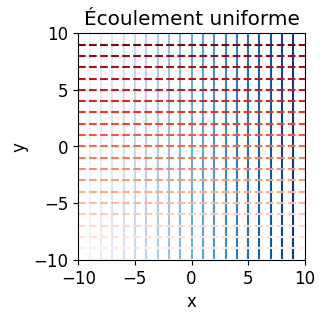

In [8]:
plot_contours_phi_psi(X,Y,PHI,PSI,titre='Écoulement uniforme')

4. Tracez les lignes de courant avec la fonction `streamplot` de `matplotlib`

In [9]:
U = Vinf * np.ones_like(X)
V = np.zeros_like(X)

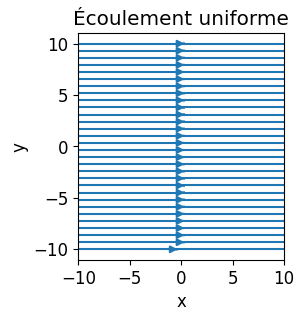

In [10]:
plot_lignes_courant(X,Y,U,V,titre='Écoulement uniforme')

5. L'écoulement uniforme a maintenant une incidence $\alpha$ par rapport à la direction $\vec{e}_x$. Retrouvez les nouvelles équations de $\varphi$ et $\psi$, et tracez les lignes de courants et potentielles.

In [11]:
Vinf = 1.0
alpha = 10 * np.pi / 180. # 10 degres convertis en radians
PHI = Vinf * ( np.cos(alpha)*X + np.sin(alpha)*Y )
PSI = Vinf * ( -np.sin(alpha)*X + np.cos(alpha)*Y )
U = Vinf * np.cos(alpha) * np.ones_like(X)
V = Vinf * np.sin(alpha) * np.ones_like(X)

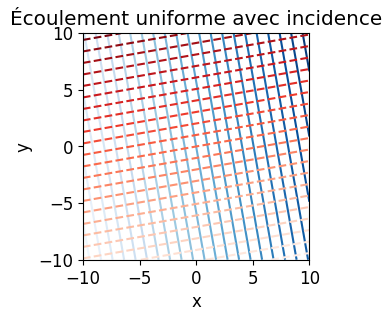

In [12]:
plot_contours_phi_psi(X,Y,PHI,PSI,titre='Écoulement uniforme avec incidence')

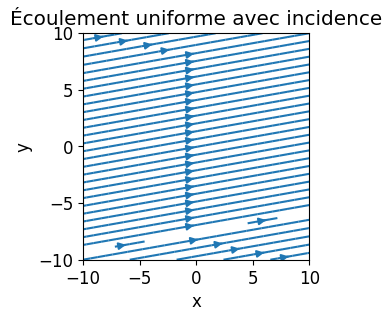

In [13]:
plot_lignes_courant(X,Y,U,V,titre='Écoulement uniforme avec incidence')

### Exercice 3 - Source et puits
On considère un écoulement de source de débit linéique $\Lambda$ qui l'on notera `L` dans le code.
1. Rappellez les composantes radiale et tangentielle de vitesse
2. Rappellez les fonctions de courant et potentiel en utilisant les coordonnées cartésiennes.

3. Créez une source en $(0,0)$

In [14]:
R = np.sqrt(X**2+Y**2)
THETA_OLD = np.arctan(Y/X)
THETA = np.arctan2(Y,X)

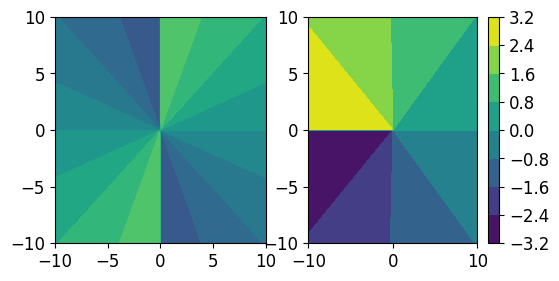

In [15]:
fig,ax = plt.subplots(1,2,figsize=(6,3))
C0 = ax[0].contourf(X,Y,THETA_OLD,vmin=-np.pi,vmax=np.pi)
C1 = ax[1].contourf(X,Y,THETA,vmin=-np.pi,vmax=np.pi)
plt.colorbar(C1)
plt.show()

In [16]:
L = 2.5
PHI = L/(2*np.pi) * np.log(R)
PSI = L/(2*np.pi) * THETA

In [17]:
U = L/(2*np.pi) * np.cos(THETA)/R
V = L/(2*np.pi) * np.sin(THETA)/R

4. Tracez les lignes de courant et iso-potentiel

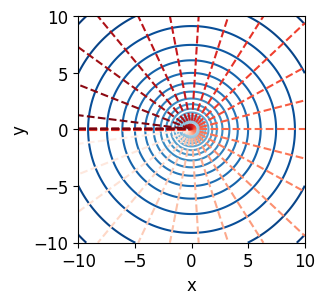

In [18]:
plot_contours_phi_psi(X,Y,PHI,PSI)

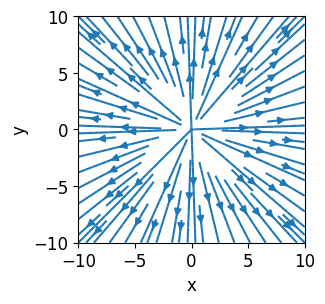

In [19]:
plot_lignes_courant(X,Y,U,V)

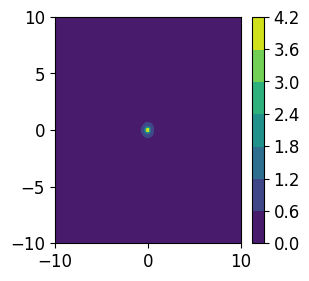

In [20]:
plt.contourf(X,Y,np.sqrt(U**2+V**2))
plt.colorbar()

5. Créez une source en $(-2,0)$ et tracez la.

In [21]:
x0 = -2.0
y0 = 0.0
R = np.sqrt((X-x0)**2+(Y-y0)**2)
THETA = np.arctan2(Y-y0,X-x0)
PHI = L/(2*np.pi) * np.log(R)
PSI = L/(2*np.pi) * THETA 
U = L/(2*np.pi) * np.cos(THETA)/R
V = L/(2*np.pi) * np.sin(THETA)/R

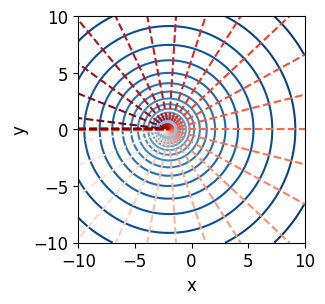

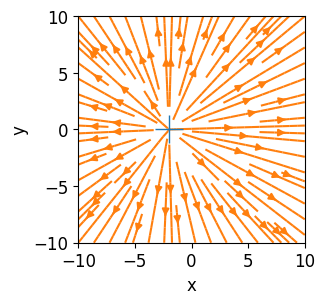

In [22]:
plot_contours_phi_psi(X,Y,PHI,PSI)
plt.plot(x0,y0,marker='+',markersize=20,markeredgewidth=1.0)
plot_lignes_courant(X,Y,U,V)


### Exercice 4 - Écoulement uniforme et source
Superposez un écoulement uniforme d'incitdence $\alpha$ et une source en $(x_0,y_0)$.   
Est ce que l'écoulement est modifié par la position de la source et l'intensité de la vitesse et du débit ? 

In [23]:
Vinf = 0.5
alpha = np.deg2rad(8.0)
r0 = 2.0
xP = r0 * np.cos(alpha) 
yP = r0 * np.sin(alpha) 
xS = -r0 * np.cos(alpha)
yS = -r0 * np.sin(alpha)
L = 1.5

In [24]:
print(xP,yP)
print(xS,yS)

1.9805361374831407 0.2783462019201309
-1.9805361374831407 -0.2783462019201309


L'écoulement uniforme

In [25]:
PHI1 = Vinf * ( np.cos(alpha)*X + np.sin(alpha)*Y )
PSI1 = Vinf * ( -np.sin(alpha)*X + np.cos(alpha)*Y )
U1 = Vinf * np.cos(alpha) * np.ones_like(X)
V1 = Vinf * np.sin(alpha) * np.ones_like(X)

Une source en $(x_0,y_0)$

In [26]:
R2 = np.sqrt((X-xS)**2+(Y-yS)**2)
THETA2 = np.arctan2(Y-yS,X-xS)
PHI2 = L/(2*np.pi) * np.log(R2)
PSI2 = L/(2*np.pi) * THETA2 
U2 = L/(2*np.pi) * np.cos(THETA2)/R2
V2 = L/(2*np.pi) * np.sin(THETA2)/R2

La superposition

In [27]:
PHI = PHI1 + PHI2
PSI = PSI1 + PSI2
U = U1 + U2
V = V1 + V2

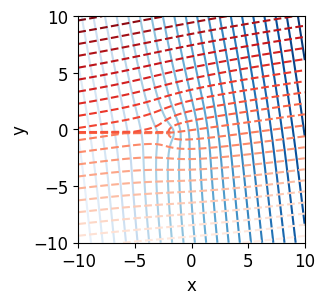

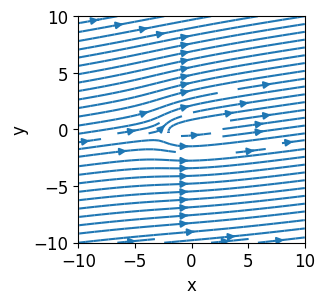

In [28]:
plot_contours_phi_psi(X,Y,PHI,PSI)
plot_lignes_courant(X,Y,U,V)

Ajoutez un puits pour former l'ovale de Rankine. 
* Vous pouvez régler l'écoulement sans incidence pour vous faciliter le positionnement.
* Faites varier l'intensité et la position relative des sources et puits et celle de la vitesse 
* Essayez de matérialiser le contour de l'obstacle

In [29]:
# PHI3 =
# PSI3 = 
# U3 = 
# V3 = 

In [30]:
R3 = np.sqrt((X-xP)**2+(Y-yP)**2)
THETA3 = np.arctan2(Y-yP,X-xP)
PHI3 = -L/(2*np.pi) * np.log(R3)
PSI3 = -L/(2*np.pi) * THETA3 
U3 = -L/(2*np.pi) * np.cos(THETA3)/R3
V3 = -L/(2*np.pi) * np.sin(THETA3)/R3

In [31]:
PHI = PHI1 + PHI2 + PHI3
PSI = PSI1 + PSI2 + PSI3
U = U1 + U2 + U3
V = V1 + V2 + V3

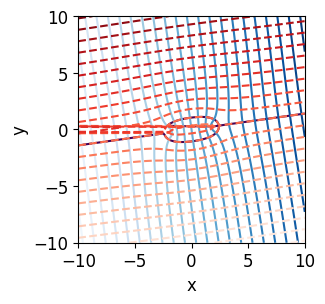

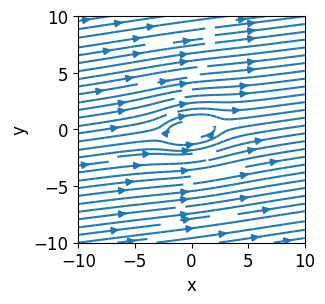

In [32]:
plt.contour(X,Y,PSI,levels=(0,))
plot_contours_phi_psi(X,Y,PHI,PSI)

plot_lignes_courant(X,Y,U,V)